# User Engagement

<img src="https://api.backlinko.com/app/uploads/2019/09/average-bounce-rate-differs-between-website-categories-768x602.webp" alt="img">

<a href="https://statso.io/bounce-rate-case-study/" target="_blank">Data burada</a>

* Bu proje, kullanıcıların oturum süreleri ve etkileşimleri üzerinden **deep learning** kullanarak  **session duration high** sutununun tahmin edilmesini hedeflemekte. Özellikle, kullanıcıların web sitesindeki oturum sürelerinin **3** dakikadan uzun olup olmadığını belirlemek için çeşitli özellikler analiz edilmektedir. Bu bağlamda, derin öğrenme teknikleri ile oluşturulan bir **classification** modeli, kullanıcı davranışlarını anlamak ve daha iyi bir kullanıcı deneyimi sağlamak amacıyla geliştirilmiştir.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("bounce-rate.csv")

In [3]:
df.head()

,Client ID,Sessions,Avg. Session Duration,Bounce Rate
0,5.778476e+08,367,00:01:35,87.19%
1,1.583822e+09,260,00:01:04,29.62%
2,1.030699e+09,237,00:00:02,99.16%
3,1.025030e+09,226,00:02:22,25.66%
4,1.469968e+09,216,00:01:23,46.76%


In [4]:
df.shape

(999, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client ID              999 non-null    float64
 1   Sessions               999 non-null    int64  
 2   Avg. Session Duration  999 non-null    object 
 3   Bounce Rate            999 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 31.3+ KB


In [18]:
# bu sutunda arada değişik bi karakter vardı data obj görünüyordu
print(df['Avg. Session Duration'].unique())

['00:01:35' '00:01:04' '00:00:02' '00:02:22' '00:01:23' '00:01:44'
 '00:00:33' '00:01:22' '00:00:12' '00:00:24' '00:08:27' '00:02:46'
 '00:00:45' '00:00:01' '00:03:14' '00:09:43' '00:02:05' '00:03:56'
 '00:04:40' '00:02:35' '00:30:40' '00:03:53' '00:04:32' '00:07:01'
 '00:00:25' '00:03:15' '00:01:40' '00:01:56' '00:04:46' '00:03:52'
 '00:00:23' '00:00:36' '00:02:42' '00:03:28' '00:00:42' '00:03:01'
 '00:04:37' '00:00:27' '00:01:07' '00:01:25' '00:01:31' '00:01:17'
 '00:01:28' '00:02:37' '00:00:40' '00:04:14' '00:02:06' '00:00:44'
 '00:02:32' '00:20:30' '00:08:33' '00:00:32' '00:04:04' '00:06:09'
 '00:05:34' '00:09:29' '00:00:10' '00:00:08' '00:03:24' '00:04:41'
 '00:00:47' '00:02:20' '00:04:58' '00:03:07' '00:01:42' '00:03:45'
 '00:01:29' '00:00:43' '00:01:18' '00:02:14' '00:03:47' '00:00:46'
 '00:08:46' '00:06:56' '00:01:30' '00:06:07' '00:01:15' '00:06:30'
 '00:01:27' '00:00:35' '00:08:23' '00:01:08' '00:00:51' '00:04:07'
 '00:00:11' '00:08:41' '00:05:27' '00:02:24' '00:01:39' '00:04

In [19]:
df['Avg. Session Duration'] = df['Avg. Session Duration'].str.replace('<', '', regex=False)
df['Avg. Session Duration'] = df['Avg. Session Duration'].str.strip()

In [20]:
df['Avg. Session Duration'] = pd.to_timedelta(df['Avg. Session Duration']) # otorum süreleri gibi zaman aralıklarını kullanacağımız içn deltatime kullandık

In [21]:
df.head()

,Client ID,Sessions,Avg. Session Duration,Bounce Rate
0,5.778476e+08,367,0 days 00:01:35,87.19%
1,1.583822e+09,260,0 days 00:01:04,29.62%
2,1.030699e+09,237,0 days 00:00:02,99.16%
3,1.025030e+09,226,0 days 00:02:22,25.66%
4,1.469968e+09,216,0 days 00:01:23,46.76%


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Client ID              999 non-null    float64        
 1   Sessions               999 non-null    int64          
 2   Avg. Session Duration  999 non-null    timedelta64[ns]
 3   Bounce Rate            999 non-null    object         
dtypes: float64(1), int64(1), object(1), timedelta64[ns](1)
memory usage: 31.3+ KB


In [23]:
df['Bounce Rate'] = df['Bounce Rate'].str.replace('%', '').astype(float) / 100

In [24]:
df.describe()

,Client ID,Sessions,Avg. Session Duration,Bounce Rate
count,9.990000e+02,999.000000,999,999.000000
mean,1.036401e+09,32.259259,0 days 00:03:38.191191191,0.653080
std,6.151503e+08,24.658588,0 days 00:04:02.433724353,0.229973
min,1.849182e+05,17.000000,0 days 00:00:00,0.048800
25%,4.801824e+08,21.000000,0 days 00:00:53.500000,0.473700
50%,1.029507e+09,25.000000,0 days 00:02:28,0.666700
75%,1.587982e+09,35.000000,0 days 00:04:49,0.851900
max,2.063338e+09,367.000000,0 days 00:30:40,1.000000


In [29]:
# Rakamlar çok sık ve karışık, güzel bir grafik oluşmuyor, visualization yapmadım.

In [30]:
# 3 dakikadan uzun kalıp kalmaması üzerine bi classification modeli yapacağım, yeni bi sutun açıyorum
# avg.ses sutununa göre bu sutuna atayacak
duration_threshold = pd.Timedelta(minutes=3)
df['Session Duration High'] = (df['Avg. Session Duration'] > duration_threshold).astype(int)

In [31]:
x=df[['Sessions', 'Bounce Rate']]
y=df[['Session Duration High']]

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # cevabımız 1
])

C:\Users\İdeaPad\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
history=model.fit(x_train, y_train, epochs=27, batch_size=8, validation_split=0.2)

Epoch 1/27
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7626 - loss: 0.4895 - val_accuracy: 0.7750 - val_loss: 0.4433
Epoch 2/27
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7562 - loss: 0.4684 - val_accuracy: 0.7812 - val_loss: 0.4204
Epoch 3/27
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7382 - loss: 0.4821 - val_accuracy: 0.8188 - val_loss: 0.4246
Epoch 4/27
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7473 - loss: 0.4985 - val_accuracy: 0.7937 - val_loss: 0.4326
Epoch 5/27
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7256 - loss: 0.4965 - val_accuracy: 0.7688 - val_loss: 0.4568
Epoch 6/27
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7683 - loss: 0.4754 - val_accuracy: 0.8062 - val_loss: 0.4164
Epoch 7/27
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8171 - loss: 0.4333 - val_accuracy: 0.7688 - val_loss: 0.4446
Epoch 8/27
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7701 - loss: 0.4543 - val_accuracy: 0.7937 - val_loss:

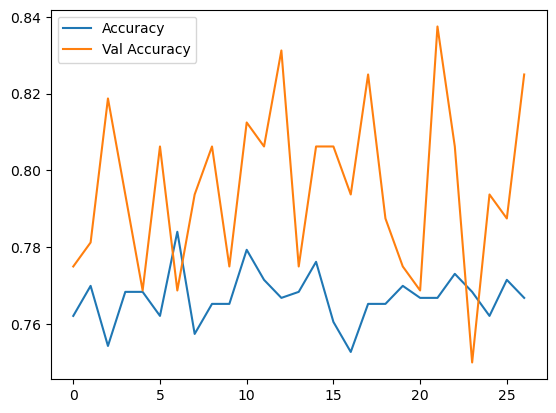

In [51]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val Accuracy')
plt.legend()

In [52]:
score=model.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7500 - loss: 0.4769  


In [ ]:
* Modelimiz 0.75 başarı oranına sahip, bu biraz daha yükseltilebilr, loss 0.47, bu ise biraz daha düşürülebilir. 
* başarı oranını artıralım , scale edip deneyelim

## Z score

In [54]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [61]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)),  
    layers.Dense(32, activation='relu'), 
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Çıkış
])

C:\Users\İdeaPad\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
history=model.fit(x_train, y_train, epochs=50, batch_size=8, validation_split=0.2)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5225 - loss: 0.7307 - val_accuracy: 0.5938 - val_loss: 0.6925
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5568 - loss: 0.7128 - val_accuracy: 0.5938 - val_loss: 0.6601
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5789 - loss: 0.6779 - val_accuracy: 0.5938 - val_loss: 0.6577
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5958 - loss: 0.6709 - val_accuracy: 0.5938 - val_loss: 0.6807
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5854 - loss: 0.6747 - val_accuracy: 0.5938 - val_loss: 0.6769
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5618 - loss: 0.6785 - val_accuracy: 0.5938 - val_loss: 0.6530
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5790 - loss: 0.6636 - val_accuracy: 0.5938 - val_loss: 0.6359
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5668 - loss: 0.6570 - val_accuracy: 0.5938 - val_loss:

* Normalize edip layer ekledikten sonra sonuç 1 arttı, data daha fazlaolsaydı daha iyi bir model sonuç verebilirdi, dat 999 satır, ve eğitime giden kısmı çıkarınca azalmış oldu.